In [212]:
#importing python packages that will be used in the project
import pandas as pd
import numpy as np
import requests
import os


## Data Gathering Process

In [213]:
 # read the twitter_archive_enhanced.csv data set
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [214]:
#Gathering the image_rediction data set using url and the request lbrary in python
folder_name = 'image_predictions1'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
response.content

with open(os.path.join(folder_name, url.split('/')[-1]), mode ='wb') as file:
        file.write(response.content)


In [71]:
# Gathering the twitter dataset from the WeRatesDogs twitter handle using tweepy AP1

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions



consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)



# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API


tweet_ids = twitter_archive_enhanced.tweet_id.values
len(tweet_ids)



# Query Twitter's API for JSON data for each tweet ID in the Twitter archive


count = 0
fails_dict = {}
start = timer()


# Save each tweet's returned JSON as a new line in a .txt file


with open('tweet_json.txt', 'w') as outfile:
    
    
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    
    
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)





SyntaxError: EOL while scanning string literal (<ipython-input-71-2a58842cc61e>, line 72)

In [215]:
# read the tweet_jsons.txt to a data frame
import json
df_list = []

filepath = 'tweet-json.txt'
cnt = 0
with open(filepath) as fp:
    for cnt, line in enumerate(fp):
        new_line = json.loads(line)
        retweeted = new_line['retweeted']
        favorited = new_line['favorited']
        retweet_count = new_line['retweet_count']
        favorite_count = new_line['favorite_count']
        user_id = new_line['id']
        
        df_list.append({'user_id': int(user_id),'favorite_count': int(favorite_count),
                        'retweet_count': int(retweet_count),'favorited': favorited,'retweeted': retweeted})
        cnt += 1
        

tweets_df = pd.DataFrame(df_list, columns = ['user_id', 'favorite_count', 'retweet_count', 'favorited', 'retweeted'])

In [216]:
# read the image_predictions tsv file into a dataframe
image_prediction = pd.read_csv("image-predictions.tsv", sep ="\t")

In [217]:
# Duplicate eac of the data set
image_prediction_copy = image_prediction.copy()

tweets_df_copy =  tweets_df.copy()

twitter_archive_enhanced_copy = twitter_archive_enhanced.copy()

# Data Assessing Process


### Data Tidyness Issues

- The image_prediction and tweets_df are part of the same observational unit as twitter_archive_enhanced but there are three separate tables so they should be merged and stored in a file called twitter_archive_master.csv, as per project instructions.

- The 4 different columns doggo, floofer, pupper and puppo, are all relative to the same variable that identifies the stage of dog. So we can melt these columns into a single column named "dog stage" or something similar. Why this is a tidiness issue and not a quality one? Tidiness issues pertain to the structure of data and one of the requirements for tidy data is that each variable forms a column.


## Data Quality Issues

- Rename the user_id column in the df_table to tweet_id to ease merging tables together.
- Timestamp variable datatype to datetime object.
- Retweeted timestamp variable datatype to datetime object.
- in_reply_to_status_id should be of data type object not float.
- tweet_id variable should be of data type object and not intergers or floats because they are not numeric and are not need to perform calculations.
- Change retweeted_status_user_id data type from float to object
- Change in_reply_to_user_id data type from float to object
- using the regular expression to extract retweeted id from the expanded_urls variable.
- Extract the dog_rating numerator and denominator from the text column.
- Change the data type of dog ratings ( numerator and denominator) from string to float
- Change the name of some dogs from a to its original name in the text variable

In [218]:
# head of the data frame
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [219]:
# data info()
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [220]:
image_prediction.shape

(2075, 12)

In [221]:
# data head of the tweet_jsons.txt file
tweets_df.head()

,user_id,favorite_count,retweet_count,favorited,retweeted
0,892420643555336193,39467,8853,False,False
1,892177421306343426,33819,6514,False,False
2,891815181378084864,25461,4328,False,False
3,891689557279858688,42908,8964,False,False
4,891327558926688256,41048,9774,False,False


In [222]:
# tweets_df info()
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
user_id           2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
favorited         2354 non-null bool
retweeted         2354 non-null bool
dtypes: bool(2), int64(3)
memory usage: 59.9 KB


In [223]:
tweets_df.shape

(2354, 5)

In [224]:
# data head of the twitter_archive_enhanced csv file
twitter_archive_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [225]:
# data info of twitter_archive_enhanced csv file 
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [226]:
twitter_archive_enhanced.shape

(2356, 17)

## Data Cleaning Process

## Data Tidyness Issues

- The image_prediction and tweets_df are part of the same observational unit as twitter_archive_enhanced but there are three separate tables so they should be merged and stored in a file called twitter_archive_master.csv, as per project instructions.

- The 4 different columns doggo, floofer, pupper and puppo, are all relative to the same variable that identifies the stage of dog. So we can melt these columns into a single column named "dog stage" or something similar. Why this is a tidiness issue and not a quality one? Tidiness issues pertain to the structure of data and one of the requirements for tidy data is that each variable forms a column.


 **Define**
 
 Combine the three data set into one data frame.

**Code**

In [227]:
#Slice the tweet_id and jpg_url from the image_prediction table
image_pred = image_prediction[['tweet_id', 'jpg_url', 'p1', 'p2']]

#Slice the user_id, retweet_count and favorite_count from the df table
tweets_df = tweets_df[['user_id', 'retweet_count','favorite_count']]

In [228]:
#rename user_id to tweet_id this is a data quality issues but i had to perform it to be able to merge the two data set.
tweets_df.rename({'user_id':'tweet_id'}, axis = 1, inplace = True)

In [229]:
# merge the Favorite_count and retweet on the twitter_archive_enhanced 
twitter_archive_enhanced = pd.merge(tweets_df, twitter_archive_enhanced,
                            on=['tweet_id'], how='inner')

In [230]:
# test if mereging has occured
twitter_archive_enhanced.shape

(2354, 19)

In [231]:
# merge the jpg_url on the twitter_archive_enhanced table
twitter_archive_enhanced = pd.merge(image_pred, twitter_archive_enhanced,
                            on=['tweet_id'], how='inner')

# testing if merging has occured
twitter_archive_enhanced.shape

(2073, 22)

**Test**

In [232]:
twitter_archive_enhanced.sample(5)

,tweet_id,jpg_url,p1,p2,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
453,674754018082705410,https://pbs.twimg.com/media/CV01M3ZWIAAV7rv.jpg,seashore,promontory,488,1456,6.747522e+17,4.196984e+09,2015-12-10 00:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",...,NaN,NaN,https://twitter.com/dog_rates/status/674754018...,12,10,None,None,None,None,None
1779,828650029636317184,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,golden_retriever,Chesapeake_Bay_retriever,1544,10467,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",...,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
1716,819015331746349057,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,prison,palace,21794,0,NaN,NaN,2017-01-11 02:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",...,4.196984e+09,2017-01-11 02:21:57 +0000,https://twitter.com/dog_rates/status/819006400...,14,10,Sunny,doggo,None,None,None
973,706681918348251136,https://pbs.twimg.com/media/Cc6jcYRXIAAFuox.jpg,toy_poodle,miniature_poodle,1103,3627,NaN,NaN,2016-03-07 03:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",...,NaN,NaN,https://twitter.com/dog_rates/status/706681918...,12,10,Katie,None,None,None,None
1846,839290600511926273,https://pbs.twimg.com/media/C6XBt9XXEAEEW9U.jpg,web_site,monitor,158,0,NaN,NaN,2017-03-08 01:44:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",...,4.119842e+07,2017-03-08 01:41:24 +0000,https://twitter.com/alexmartindawg/status/8392...,10,10,None,None,None,pupper,None


**Define**

Melt the 4 different columns doggo, floofer, pupper and puppo into one column titled dog stage

**Code**

In [233]:
# handle none
twitter_archive_enhanced.doggo.replace('None', '', inplace=True)
twitter_archive_enhanced.floofer.replace('None', '', inplace=True)
twitter_archive_enhanced.pupper.replace('None', '', inplace=True)
twitter_archive_enhanced.puppo.replace('None', '', inplace=True)

# merge into column
twitter_archive_enhanced['dog_stage'] = twitter_archive_enhanced.doggo + twitter_archive_enhanced.floofer + twitter_archive_enhanced.pupper + twitter_archive_enhanced.puppo

# handle multiple stages
twitter_archive_enhanced.loc[twitter_archive_enhanced.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_enhanced.loc[twitter_archive_enhanced.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_enhanced.loc[twitter_archive_enhanced.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

twitter_archive_enhanced.loc[twitter_archive_enhanced.dog_stage == 'pupperdoggo', 'dog_stage'] = 'pupper, doggo'
twitter_archive_enhanced.loc[twitter_archive_enhanced.dog_stage == 'pupperpuppo', 'dog_stage'] = 'pupper, puppo'
twitter_archive_enhanced.loc[twitter_archive_enhanced.dog_stage == 'pupperfloofer', 'dog_stage'] = 'pupper, floofer'

twitter_archive_enhanced.loc[twitter_archive_enhanced.dog_stage == 'puppodoggo', 'dog_stage'] = 'puppo, doggo'
twitter_archive_enhanced.loc[twitter_archive_enhanced.dog_stage == 'puppopupper', 'dog_stage'] = 'puppo, pupper'
twitter_archive_enhanced.loc[twitter_archive_enhanced.dog_stage == 'puppofloofer', 'dog_stage'] = 'puppo, floofer'

twitter_archive_enhanced.loc[twitter_archive_enhanced.dog_stage == 'flooferdoggo', 'dog_stage'] = 'floofer, doggo'
twitter_archive_enhanced.loc[twitter_archive_enhanced.dog_stage == 'flooferpupper', 'dog_stage'] = 'floofer, pupper'
twitter_archive_enhanced.loc[twitter_archive_enhanced.dog_stage == 'flooferpuppo', 'dog_stage'] = 'floofer, puppo'

# handle missing values
twitter_archive_enhanced.loc[twitter_archive_enhanced.dog_stage == '', 'dog_stage'] = np.nan

In [234]:
# Drop columns that are not relevant
twitter_archive_enhanced.drop(['doggo','floofer', 'pupper','puppo'], axis = 1, inplace = True)

In [235]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 19 columns):
tweet_id                      2073 non-null int64
jpg_url                       2073 non-null object
p1                            2073 non-null object
p2                            2073 non-null object
retweet_count                 2073 non-null int64
favorite_count                2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 no

**Test**

In [236]:
twitter_archive_enhanced.sample(5)

,tweet_id,jpg_url,p1,p2,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1100,720775346191278080,https://pbs.twimg.com/media/CgC1WqMW4AI1_N0.jpg,Newfoundland,groenendael,760,2702,NaN,NaN,2016-04-15 00:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Berkeley. He's in a predicament. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720775346...,10,10,Berkeley,NaN
352,672538107540070400,https://pbs.twimg.com/media/CVVV1wJWoAEcOyk.jpg,Siamese_cat,Chihuahua,404,1089,NaN,NaN,2015-12-03 22:09:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Darby. He's a Fiscal Tutankhamen Waxbeard...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672538107...,7,10,Darby,NaN
351,672523490734551040,https://pbs.twimg.com/media/CVVIjGbWwAAxkN0.jpg,golden_retriever,chow,189,696,NaN,NaN,2015-12-03 21:11:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When she says she'll be ready in a minute but ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672523490...,10,10,None,NaN
1010,709409458133323776,https://pbs.twimg.com/media/CdhUIMSUIAA4wYK.jpg,Shetland_sheepdog,collie,788,2855,NaN,NaN,2016-03-14 16:02:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Billy. He sensed a squirrel. 8/10 damn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709409458...,8,10,Billy,NaN
287,671154572044468225,https://pbs.twimg.com/media/CVBrhXoWIAAox_C.jpg,Labrador_retriever,Chesapeake_Bay_retriever,241,769,NaN,NaN,2015-11-30 02:31:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Holly. She's trying to teach small human-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671154572...,11,10,Holly,NaN


In [237]:
twitter_archive_enhanced.dog_stage.value_counts()

pupper            210
doggo              67
puppo              23
doggo, pupper      11
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

### Data Quality Issues

- Rename the user_id column in the df_table to tweet_id to ease merging tables together.
- Timestamp variable datatype to datetime object.
- Retweeted timestamp variable datatype to datetime object.
- in_reply_to_status_id should be of data type object not float.
- tweet_id variable should be of data type object and not intergers or floats because they are not numeric and are not need to perform calculations.
- Change retweeted_status_user_id data type from float to object
- Change in_reply_to_user_id data type from float to object
- using the regular expression to extract retweeted id from the expanded_urls variable.
- Extract the dog_rating numerator and denominator from the text column.
- Change the data type of dog ratings ( numerator and denominator) from string to float
- Change the name of some dogs from 'a' to its original name in the text variable

In [238]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 19 columns):
tweet_id                      2073 non-null int64
jpg_url                       2073 non-null object
p1                            2073 non-null object
p2                            2073 non-null object
retweet_count                 2073 non-null int64
favorite_count                2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 no

**Define**

- Change the Timestamp and Retweeted timestamp variables from object to datatime object

- Change the tweet_id and in_reply_to_status_id  variables from integer to object

- Change retweeted_status_user_id data type from float to object

- Change in_reply_to_user_id data type from float to object

- Use regular expression to extract the retweeted id values from the expanded_urls variable

**Code**

In [239]:
#Change timestamp data type from object to datetime
twitter_archive_enhanced.timestamp = pd.to_datetime(twitter_archive_enhanced.timestamp)

#Change retweeted_status_timestamp data type from object to datetime
twitter_archive_enhanced.retweeted_status_timestamp = pd.to_datetime(twitter_archive_enhanced.retweeted_status_timestamp)

#Change tweet_id data type from int to object
twitter_archive_enhanced.tweet_id = twitter_archive_enhanced.tweet_id.apply(str)

#Change tweet_id data type from float to object
twitter_archive_enhanced.in_reply_to_status_id = twitter_archive_enhanced.in_reply_to_status_id.apply(str)

#Change retweeted_status_user_id data type from float to object
twitter_archive_enhanced.retweeted_status_user_id = twitter_archive_enhanced.retweeted_status_user_id.apply(str)

#Change in_reply_to_user_id data type from float to object
twitter_archive_enhanced.in_reply_to_user_id = twitter_archive_enhanced.in_reply_to_user_id.apply(str)

# using the regular expression to extract retweeted id from the expanded_urls variable
twitter_archive_enhanced.retweeted_status_id = twitter_archive_enhanced.expanded_urls.str.extract('(\d{18})', expand = True)

**Test**

In [240]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 19 columns):
tweet_id                      2073 non-null object
jpg_url                       2073 non-null object
p1                            2073 non-null object
p2                            2073 non-null object
retweet_count                 2073 non-null int64
favorite_count                2073 non-null int64
in_reply_to_status_id         2073 non-null object
in_reply_to_user_id           2073 non-null object
timestamp                     2073 non-null datetime64[ns, UTC]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           2073 non-null object
retweeted_status_user_id      2073 non-null object
retweeted_status_timestamp    79 non-null datetime64[ns, UTC]
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name  

**Define**

- Extract the correct dog numerator and Dog denominator values from the text variable

**Code**

In [241]:
# Extract the values of the numerator and denominator for the dog ratings
rating = twitter_archive_enhanced.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['extractedrating_numerator', 'extractedrating_denominator']

In [242]:
# Concatenate this values to the data frame twitter_archive_enhanced
twitter_archive_enhanced = pd.concat([twitter_archive_enhanced, rating], axis = 1)

**Test**

In [243]:
# Testing if code works perfectly
twitter_archive_enhanced.head()

,tweet_id,jpg_url,p1,p2,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,...,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,extractedrating_numerator,extractedrating_denominator
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,collie,532,2535,nan,nan,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",...,666020888022790149,nan,NaT,https://twitter.com/dog_rates/status/666020888...,8,10,None,NaN,8,10
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,miniature_pinscher,48,132,nan,nan,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",...,666029285002620928,nan,NaT,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,7,10
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,malinois,47,128,nan,nan,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",...,666033412701032449,nan,NaT,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,9,10
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,redbone,147,311,nan,nan,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",...,666044226329800704,nan,NaT,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,6,10
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,Rottweiler,41,111,nan,nan,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",...,666049248165822465,nan,NaT,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN,5,10


In [244]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 21 columns):
tweet_id                       2073 non-null object
jpg_url                        2073 non-null object
p1                             2073 non-null object
p2                             2073 non-null object
retweet_count                  2073 non-null int64
favorite_count                 2073 non-null int64
in_reply_to_status_id          2073 non-null object
in_reply_to_user_id            2073 non-null object
timestamp                      2073 non-null datetime64[ns, UTC]
source                         2073 non-null object
text                           2073 non-null object
retweeted_status_id            2073 non-null object
retweeted_status_user_id       2073 non-null object
retweeted_status_timestamp     79 non-null datetime64[ns, UTC]
expanded_urls                  2073 non-null object
rating_numerator               2073 non-null int64
rating_denominator             2073 non-

In [245]:
twitter_archive_enhanced.drop(columns = ['rating_numerator', 'rating_denominator'], inplace = True)

In [246]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 19 columns):
tweet_id                       2073 non-null object
jpg_url                        2073 non-null object
p1                             2073 non-null object
p2                             2073 non-null object
retweet_count                  2073 non-null int64
favorite_count                 2073 non-null int64
in_reply_to_status_id          2073 non-null object
in_reply_to_user_id            2073 non-null object
timestamp                      2073 non-null datetime64[ns, UTC]
source                         2073 non-null object
text                           2073 non-null object
retweeted_status_id            2073 non-null object
retweeted_status_user_id       2073 non-null object
retweeted_status_timestamp     79 non-null datetime64[ns, UTC]
expanded_urls                  2073 non-null object
name                           2073 non-null object
dog_stage                      320 non-

**Define**

Change extracted dog ratings from string to float

**Code**

In [206]:
# Change the data type of extractedrating_numerator and extractedrating_denominator from string to float
twitter_archive_enhanced.extractedrating_numerator = twitter_archive_enhanced.extractedrating_numerator.astype(float)

twitter_archive_enhanced.extractedrating_denominator = twitter_archive_enhanced.extractedrating_denominator.astype(float)

**Test**

In [207]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 19 columns):
tweet_id                       2073 non-null object
jpg_url                        2073 non-null object
p1                             2073 non-null object
p2                             2073 non-null object
retweet_count                  2073 non-null int64
favorite_count                 2073 non-null int64
in_reply_to_status_id          2073 non-null object
in_reply_to_user_id            2073 non-null object
timestamp                      2073 non-null datetime64[ns, UTC]
source                         2073 non-null object
text                           2073 non-null object
retweeted_status_id            2073 non-null object
retweeted_status_user_id       2073 non-null object
retweeted_status_timestamp     79 non-null datetime64[ns, UTC]
expanded_urls                  2073 non-null object
name                           2073 non-null object
dog_stage                      320 non-

**Define**

- Change the name of some dogs from a to its original name in the text variable

**Code**

In [248]:
twitter_archive_enhanced[twitter_archive_enhanced.name == 'a']


,tweet_id,jpg_url,p1,p2,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,dog_stage,extractedrating_numerator,extractedrating_denominator
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,miniature_pinscher,48,132,nan,nan,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,666029285002620928,nan,NaT,https://twitter.com/dog_rates/status/666029285...,a,NaN,7,10
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,malinois,47,128,nan,nan,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,666033412701032449,nan,NaT,https://twitter.com/dog_rates/status/666033412...,a,NaN,9,10
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,redbone,147,311,nan,nan,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,666044226329800704,nan,NaT,https://twitter.com/dog_rates/status/666044226...,a,NaN,6,10
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,English_springer,60,136,nan,nan,2015-11-16 00:30:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,666050758794694657,nan,NaT,https://twitter.com/dog_rates/status/666050758...,a,NaN,10,10
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,Tibetan_mastiff,261,448,nan,nan,2015-11-16 00:49:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,666055525042405380,nan,NaT,https://twitter.com/dog_rates/status/666055525...,a,NaN,10,10
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,shopping_cart,shopping_basket,146,304,nan,nan,2015-11-16 00:55:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,666057090499244032,nan,NaT,https://twitter.com/dog_rates/status/666057090...,a,NaN,9,10
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,three-toed_sloth,otter,368,522,nan,nan,2015-11-16 16:37:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a funny dog. Weird toes. Won't come do...,666293911632134144,nan,NaT,https://twitter.com/dog_rates/status/666293911...,a,NaN,3,10
28,666407126856765440,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg,black-and-tan_coonhound,bloodhound,44,113,nan,nan,2015-11-17 00:06:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a southern Vesuvius bumblegruff. Can d...,666407126856765440,nan,NaT,https://twitter.com/dog_rates/status/666407126...,a,NaN,7,10
41,666701168228331520,https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg,Labrador_retriever,Chihuahua,234,449,nan,nan,2015-11-17 19:35:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a golden Buckminsterfullerene named Jo...,666701168228331520,nan,NaT,https://twitter.com/dog_rates/status/666701168...,a,NaN,8,10
44,666781792255496192,https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg,Italian_greyhound,Weimaraner,211,404,nan,nan,2015-11-18 00:55:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Bacardi named Octaviath. Ca...,666781792255496192,nan,NaT,https://twitter.com/dog_rates/status/666781792...,a,NaN,10,10


In [253]:
# Change the name of the dog from 'a' to its actual name Johm from the text variable
twitter_archive_enhanced.iloc[41, 15] = 'Johm'

# Change the name of the dog from 'a' to its actual name Jacob from the text variable
twitter_archive_enhanced.iloc[105, 15] = 'Cheryl'


# Change the name of the dog from 'a' to its actual name Wylie from the text variable
twitter_archive_enhanced.iloc[316, 15] = 'Jacob'


# Change the name of the dog from 'a' to its actual name Alfonso from the text variable
twitter_archive_enhanced.iloc[285, 15] = 'Rufus'


**Test**

In [254]:
twitter_archive_enhanced[twitter_archive_enhanced.name == 'a']

,tweet_id,jpg_url,p1,p2,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,dog_stage,extractedrating_numerator,extractedrating_denominator
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,miniature_pinscher,48,132,nan,nan,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,666029285002620928,nan,NaT,https://twitter.com/dog_rates/status/666029285...,a,NaN,7,10
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,malinois,47,128,nan,nan,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,666033412701032449,nan,NaT,https://twitter.com/dog_rates/status/666033412...,a,NaN,9,10
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,redbone,147,311,nan,nan,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,666044226329800704,nan,NaT,https://twitter.com/dog_rates/status/666044226...,a,NaN,6,10
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,English_springer,60,136,nan,nan,2015-11-16 00:30:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,666050758794694657,nan,NaT,https://twitter.com/dog_rates/status/666050758...,a,NaN,10,10
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,Tibetan_mastiff,261,448,nan,nan,2015-11-16 00:49:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,666055525042405380,nan,NaT,https://twitter.com/dog_rates/status/666055525...,a,NaN,10,10
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,shopping_cart,shopping_basket,146,304,nan,nan,2015-11-16 00:55:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,666057090499244032,nan,NaT,https://twitter.com/dog_rates/status/666057090...,a,NaN,9,10
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,three-toed_sloth,otter,368,522,nan,nan,2015-11-16 16:37:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a funny dog. Weird toes. Won't come do...,666293911632134144,nan,NaT,https://twitter.com/dog_rates/status/666293911...,a,NaN,3,10
28,666407126856765440,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg,black-and-tan_coonhound,bloodhound,44,113,nan,nan,2015-11-17 00:06:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a southern Vesuvius bumblegruff. Can d...,666407126856765440,nan,NaT,https://twitter.com/dog_rates/status/666407126...,a,NaN,7,10
44,666781792255496192,https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg,Italian_greyhound,Weimaraner,211,404,nan,nan,2015-11-18 00:55:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Bacardi named Octaviath. Ca...,666781792255496192,nan,NaT,https://twitter.com/dog_rates/status/666781792...,a,NaN,10,10
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,swab,chain_saw,1040,2679,nan,nan,2015-11-18 14:18:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a curly Ticonderoga named Pepe. No fee...,666983947667116034,nan,NaT,https://twitter.com/dog_rates/status/666983947...,a,NaN,11,10


In [256]:
# saving the cleaned data to a csv file named twitter_archive_master.csv
twitter_archive_enhanced.to_csv('twitter_archive_master.csv', index=False)

## Data Analysis and Visualization of Cleaned Data

In [266]:
# import library for analysis
import matplotlib.pyplot as plt
# Read in Data Set
df = pd.read_csv('twitter_archive_master.csv')

In [259]:
# Visualized data head
df.head(3)

,tweet_id,jpg_url,p1,p2,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,dog_stage,extractedrating_numerator,extractedrating_denominator
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,collie,532,2535,NaN,NaN,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,666020888022790149,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,None,NaN,8.0,10
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,miniature_pinscher,48,132,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,666029285002620928,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,a,NaN,7.0,10
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,malinois,47,128,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,666033412701032449,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,a,NaN,9.0,10


In [262]:
# distribution of dog stages
dog_stage = df.dog_stage.value_counts()
dog_stage

pupper            210
doggo              67
puppo              23
doggo, pupper      11
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

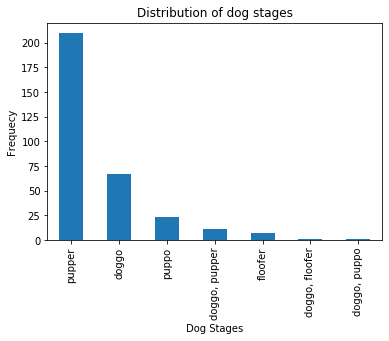

In [276]:
# visualization of dog stages
dog_stage.plot(kind = 'bar')
plt.ylabel('Frequecy')
plt.xlabel('Dog Stages')
plt.title('Distribution of dog stages')
plt.xticks(rotation = 90);

In [278]:
# Distribution of numerator rating  by dog stage
dog_stages_numerator_rating = df.groupby(['dog_stage'])['extractedrating_numerator'].mean()
dog_stages_numerator_rating

dog_stage
doggo             11.970149
doggo, floofer    11.000000
doggo, pupper     11.181818
doggo, puppo      13.000000
floofer           12.000000
pupper            10.677476
puppo             12.000000
Name: extractedrating_numerator, dtype: float64

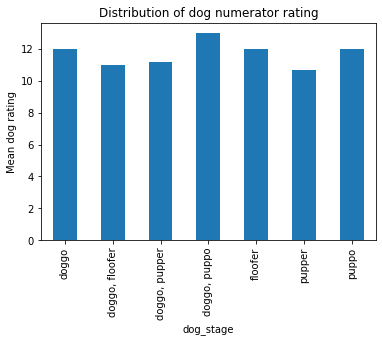

In [281]:
# visualization of numerator rating  by dog stage
dog_stages_numerator_rating.plot(kind = 'bar')
plt.ylabel('Mean dog rating')
plt.title('Distribution of dog numerator rating');

In [282]:
# Distribution of denominator rating  by dog stages
dog_stages_denominator_rating = df.groupby(['dog_stage'])['extractedrating_denominator'].mean()
dog_stages_denominator_rating

dog_stage
doggo             10
doggo, floofer    10
doggo, pupper     10
doggo, puppo      10
floofer           10
pupper            10
puppo             10
Name: extractedrating_denominator, dtype: int64

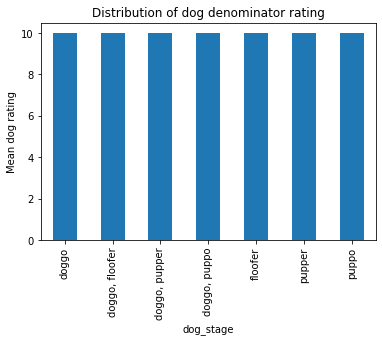

In [283]:
# graph showing the distribution of denominator rating  by dog stages
dog_stages_denominator_rating.plot(kind = 'bar')
plt.ylabel('Mean dog rating')
plt.title('Distribution of dog denominator rating');

In [284]:
# Distrbution of retweeted count by dog stage
dog_stages_retweet_count = df.groupby(['dog_stage'])['retweet_count'].mean()
dog_stages_retweet_count

dog_stage
doggo              7901.552239
doggo, floofer     3433.000000
doggo, pupper      5262.909091
doggo, puppo      19196.000000
floofer            4968.714286
pupper             2468.209524
puppo              6431.434783
Name: retweet_count, dtype: float64

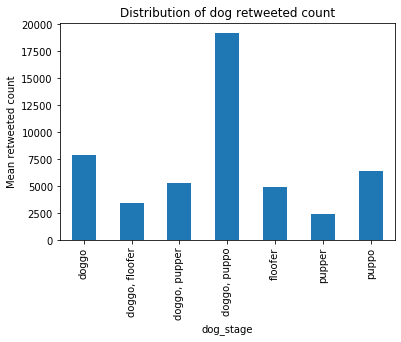

In [287]:
# Visualizatio of retweeted count by dog stage
dog_stages_retweet_count.plot(kind = 'bar')
plt.ylabel('Mean retweeted count')
plt.title('Distribution of dog retweeted count');

In [289]:
# Distribution of favourite count by dog stage
dog_stages_favorite_count = df.groupby(['dog_stage'])['favorite_count'].mean()
dog_stages_favorite_count

dog_stage
doggo             18200.776119
doggo, floofer    17169.000000
doggo, pupper     10254.363636
doggo, puppo      47844.000000
floofer           13206.000000
pupper             6957.814286
puppo             20643.739130
Name: favorite_count, dtype: float64

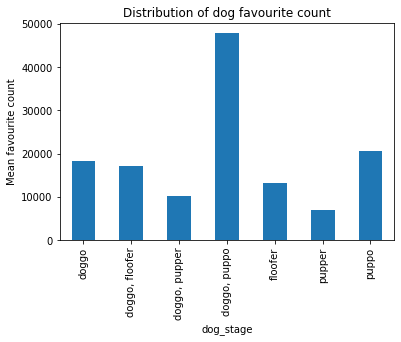

In [290]:
# graphical representation of the distribution of favourite count  by dog stage
dog_stages_favorite_count.plot(kind = 'bar')
plt.ylabel('Mean favourite count')
plt.title('Distribution of dog favourite count');